In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [2]:
carprice = pd.read_csv('car_price_prediction.csv')
carprice.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


#### Drop the 'ID' Column

In [3]:
WorkingDataSet = carprice.drop('ID', axis = 1)
WorkingDataSet

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19232,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19233,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19234,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


#### Data Exploration

In [4]:
WorkingDataSet.columns

Index(['Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year', 'Category',
       'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')

##### Car Brands

In [5]:
top10carbrands = WorkingDataSet['Manufacturer'].value_counts().head(10).index
top10carbrandsfiltered = WorkingDataSet[WorkingDataSet['Manufacturer'].isin(top10carbrands)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'LEXUS'),
  Text(1, 0, 'CHEVROLET'),
  Text(2, 0, 'HONDA'),
  Text(3, 0, 'FORD'),
  Text(4, 0, 'HYUNDAI'),
  Text(5, 0, 'TOYOTA'),
  Text(6, 0, 'MERCEDES-BENZ'),
  Text(7, 0, 'BMW'),
  Text(8, 0, 'VOLKSWAGEN'),
  Text(9, 0, 'NISSAN')])

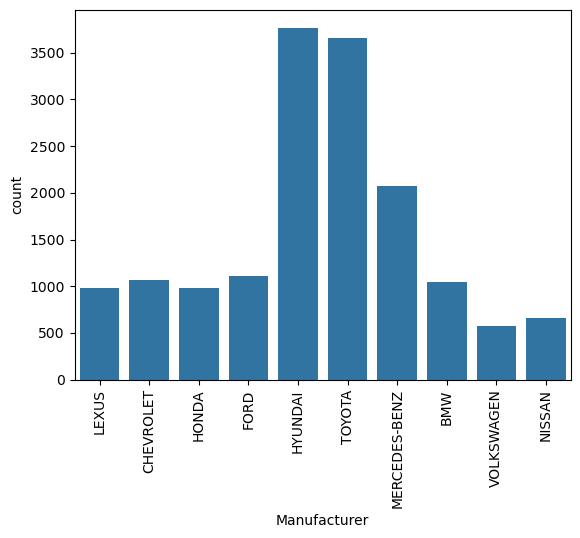

In [6]:
sns.countplot(x='Manufacturer',data=top10carbrandsfiltered)
plt.xticks(rotation=90)

##### Production Year

In [7]:
top10ProdYear = WorkingDataSet["Prod. year"].value_counts().head(10).index
top10ProdYearfiltered = WorkingDataSet[WorkingDataSet["Prod. year"].isin(top10ProdYear)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '2008'),
  Text(1, 0, '2009'),
  Text(2, 0, '2010'),
  Text(3, 0, '2011'),
  Text(4, 0, '2012'),
  Text(5, 0, '2013'),
  Text(6, 0, '2014'),
  Text(7, 0, '2015'),
  Text(8, 0, '2016'),
  Text(9, 0, '2017')])

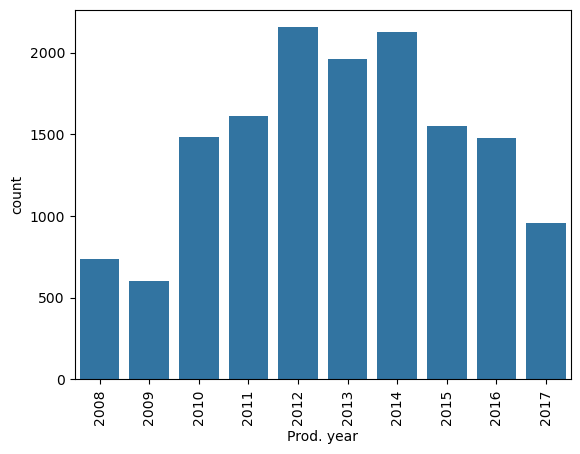

In [8]:
sns.countplot(x="Prod. year",data=top10ProdYearfiltered)
plt.xticks(rotation=90)

##### Vehicle Type

In [9]:
Values = WorkingDataSet["Category"].value_counts()

In [10]:
dfType = Values.reset_index()
dfType.columns = ['CarType','Count']

Text(0.5, 1.0, 'Pie Chart of Values by Category')

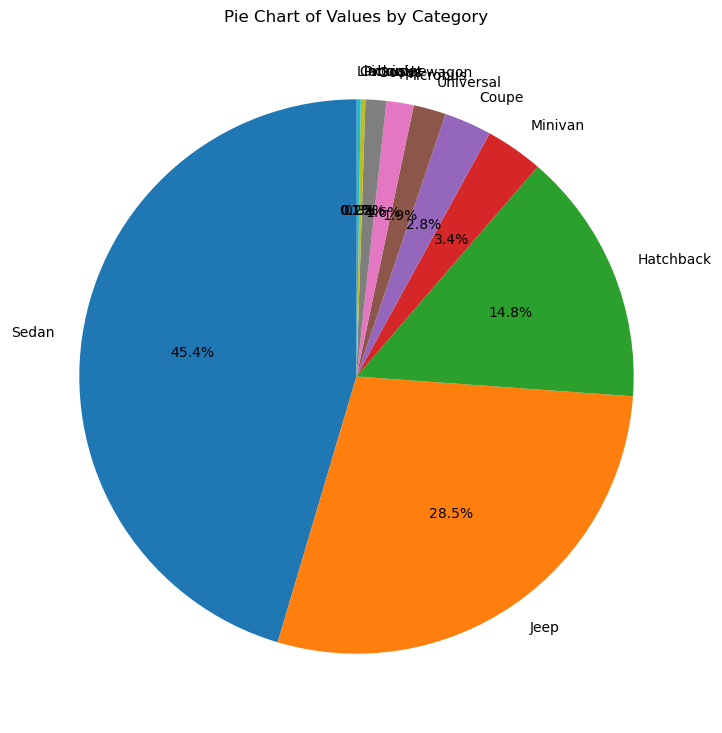

In [11]:
plt.figure(figsize = (9,9))
plt.pie(dfType['Count'], labels = dfType['CarType'], autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Values by Category")

##### GearBox

In [12]:
Values = WorkingDataSet["Gear box type"].value_counts()

In [13]:
dfType = Values.reset_index()
dfType.columns = ['Gear Box Type','Count']

Text(0.5, 1.0, 'Pie Chart of Values by Category')

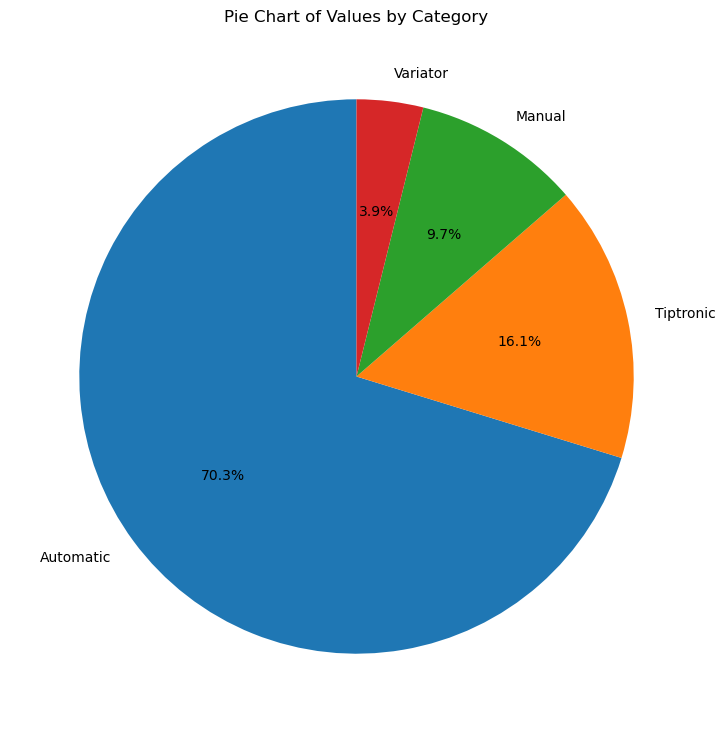

In [14]:
plt.figure(figsize = (9,9))
plt.pie(dfType['Count'], labels = dfType['Gear Box Type'], autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Values by Category")

##### Cylinders

In [15]:
top10Cylinders = WorkingDataSet["Cylinders"].value_counts().head(10).index
top10Cylindersfiltered = WorkingDataSet[WorkingDataSet["Cylinders"].isin(top10Cylinders)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '8.0'),
  Text(7, 0, '10.0'),
  Text(8, 0, '12.0'),
  Text(9, 0, '16.0')])

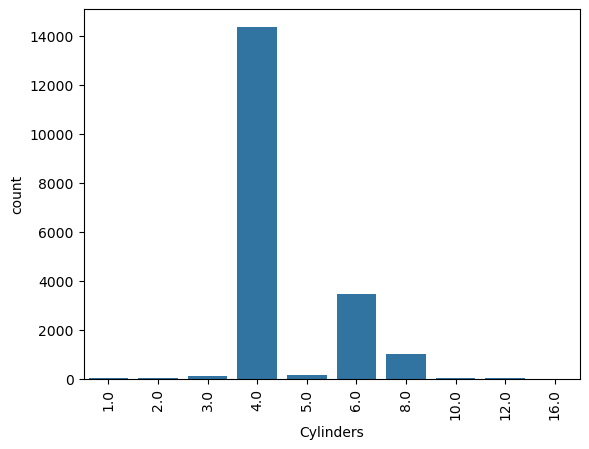

In [16]:
sns.countplot(x="Cylinders",data=top10Cylindersfiltered)
plt.xticks(rotation=90)

##### Mileage

In [18]:
top10Mileage = WorkingDataSet["Mileage"].value_counts().head(10).index
top10Mileagefiltered = WorkingDataSet[WorkingDataSet["Mileage"].isin(top10Mileage)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, '200000 km'),
  Text(1, 0, '0 km'),
  Text(2, 0, '180000 km'),
  Text(3, 0, '170000 km'),
  Text(4, 0, '130000 km'),
  Text(5, 0, '160000 km'),
  Text(6, 0, '150000 km'),
  Text(7, 0, '100000 km'),
  Text(8, 0, '120000 km'),
  Text(9, 0, '1000 km')])

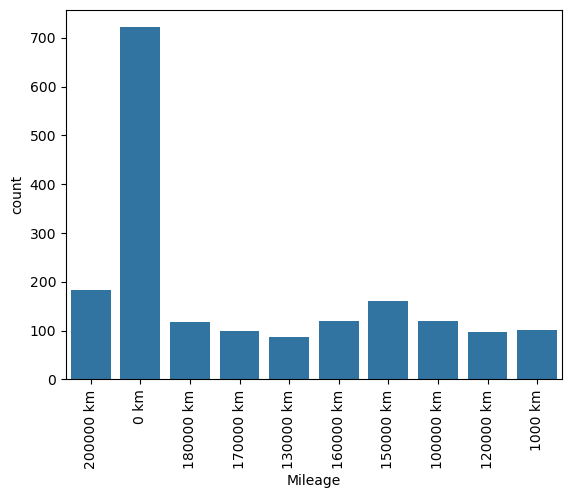

In [19]:
sns.countplot(x="Mileage",data=top10Mileagefiltered)
plt.xticks(rotation=90)

### Removing Outliers

In [20]:
def clean_miles(mileage):
    return float(mileage.split(" ")[0])

In [21]:
WorkingDataSet["Mileage"] = WorkingDataSet["Mileage"].apply(clean_miles)
WorkingDataSet["Mileage"]

0        186005.0
1        192000.0
2        200000.0
3        168966.0
4         91901.0
           ...   
19231    300000.0
19232    161600.0
19233    116365.0
19234     51258.0
19235    186923.0
Name: Mileage, Length: 19236, dtype: float64

In [22]:
Q1 = WorkingDataSet["Mileage"].quantile(.25)
#Q1
Q3 = WorkingDataSet["Mileage"].quantile(.75)
#Q3

In [23]:
IQR = Q3 - Q1

In [24]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [25]:
Outliers = WorkingDataSet[(WorkingDataSet['Mileage'] < lower_bound) | (WorkingDataSet['Mileage'] > upper_bound)]

In [26]:
Data_No_Outliers = WorkingDataSet[(WorkingDataSet['Mileage'] >= lower_bound) | (WorkingDataSet['Mileage'] <= upper_bound)]
Data_No_Outliers

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005.0,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000.0,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000.0,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966.0,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901.0,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000.0,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19232,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600.0,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19233,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365.0,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19234,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258.0,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [27]:
Data_No_Outliers["Levy"] = Data_No_Outliers["Levy"].str.replace('-','0')

Text(0.5, 1.0, 'Pie Chart of Cars by Colors')

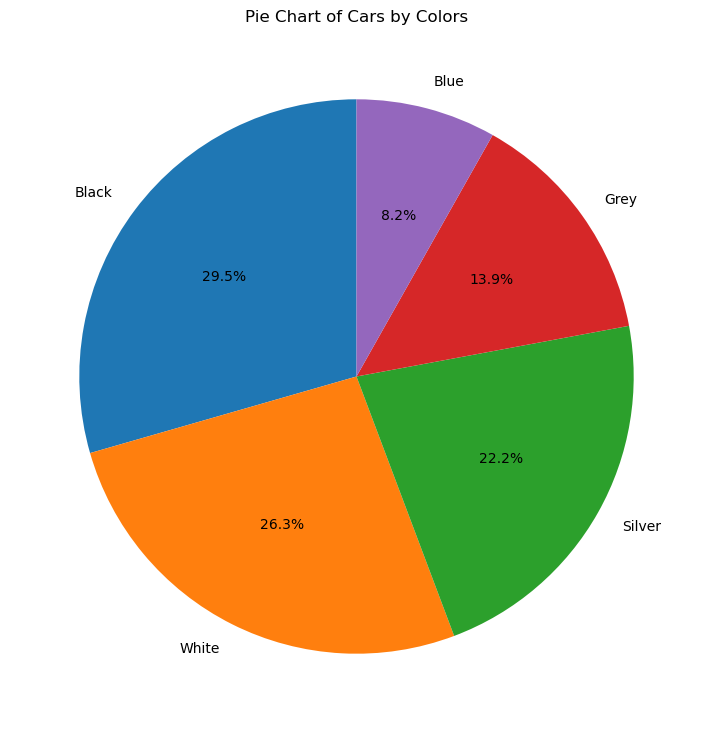

In [28]:
Values = WorkingDataSet["Color"].value_counts()
top10color = Values.head(5)
dfType = top10color.reset_index()
dfType.columns = ['Color','Count']
plt.figure(figsize = (9,9))
plt.pie(dfType['Count'], labels = dfType['Color'], autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Cars by Colors")

In [29]:
Data_No_Outliers.groupby("Manufacturer")["Price"].mean().nlargest(3)

Manufacturer
LAMBORGHINI    872946.000000
BENTLEY        197574.500000
OPEL            73305.617128
Name: Price, dtype: float64

In [30]:
List = Data_No_Outliers.columns

#### One Hot Encoding

In [31]:
for i in range(0,len(List)):
    print(Data_No_Outliers[List[i]].dtypes)

int64
object
object
object
int64
object
object
object
object
float64
float64
object
object
object
object
object
int64


In [32]:
categorical_features = Data_No_Outliers.select_dtypes(include=['object']).columns

In [33]:
one_hot_df = pd.get_dummies(Data_No_Outliers, columns=categorical_features, )
one_hot_df

,Price,Prod. year,Mileage,Cylinders,Airbags,Levy_0,Levy_1011,Levy_1016,Levy_1017,Levy_1018,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,2010,186005.0,6.0,12,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,16621,2011,192000.0,6.0,8,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,8467,2006,200000.0,4.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3607,2011,168966.0,4.0,0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,11726,2014,91901.0,4.0,4,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,8467,1999,300000.0,4.0,5,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
19232,15681,2011,161600.0,4.0,8,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
19233,26108,2010,116365.0,4.0,4,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
19234,5331,2007,51258.0,4.0,4,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### XGBOOST Model

In [35]:
data, labels = one_hot_df.drop("Price",axis = 1), one_hot_df["Price"]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size = 0.2, random_state = 42)

In [38]:
X_train

,Prod. year,Mileage,Cylinders,Airbags,Levy_0,Levy_1011,Levy_1016,Levy_1017,Levy_1018,Levy_1024,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
7808,2013,225510.0,4.0,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
16766,2007,76198.0,4.0,4,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7285,2010,189530.0,6.0,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15712,2012,218525.0,4.0,4,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
16562,2000,25000.0,6.0,6,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2018,11953.0,4.0,4,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
11964,2018,35058.0,4.0,12,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
5390,2014,110715.0,6.0,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
860,2005,162000.0,6.0,12,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [39]:
y_train

7808       314
16766     6429
7285     12388
15712    14834
16562    10036
         ...  
11284    44752
11964    18817
5390     16621
860      12544
15795     5645
Name: Price, Length: 15388, dtype: int64

In [40]:
regressor = xgboost.XGBRegressor()
regressor.fit(X_train, y_train)

[18:17:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [41]:
preds = regressor.predict(X_test)

In [42]:
preds

array([15851.448, 12748.484, 12344.329, ..., 11167.797, 13325.963,
       20867.172], dtype=float32)

In [43]:
mean_absolute_error(preds, y_test)

8428.907878788494

With the MAE being 8428, this mean in terms of this model and this code the average error on the price of cars will have an average differential of $8428 dollars each way from the actual price of the car. 

In [44]:
y_test

736      27284
8674     10349
5971     40769
1957     38737
11075    42102
         ...  
12026    12231
17892    15681
5339       314
11859    14069
9276     15681
Name: Price, Length: 3848, dtype: int64

In [45]:
Overall_Mean_Price = y_test.mean()
Overall_Mean_Price

17006.20608108108